<a href="https://colab.research.google.com/github/kjmobile/lb/blob/main/0_colab_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I COLAB INTRO

# 1. Connect Database to get the dataset

In [ ]:
! pip install pymysql

In [ ]:
! pip install IPython

In [ ]:
# import data from mySQL database  using the following info host: kaylee-db.cbgcswckszgl.us-east-1.rds.amazonaws.com, id cob, password 1212, db='data', port 3306

import pymysql
import pandas as pd
from IPython.display import Image

In [ ]:
connection=pymysql.connect(host="kaylee-db.cbgcswckszgl.us-east-1.rds.amazonaws.com", user="cob", passwd="1212", db="data")


In [ ]:
# prompt: show  databases available

cursor = connection.cursor()
cursor.execute("SHOW tables")
databases = cursor.fetchall()
for database in databases:
    print(database)


('Salary_Data',)
('airline_routes',)
('startups',)


In [ ]:
# prompt: select and import all records from Salary_Data table

cursor.execute("SELECT * FROM Salary_Data")
salary_data = cursor.fetchall()
salary_df = pd.DataFrame(salary_data)
salary_df


,0,1
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
# prompt: show available dbs

import pymysql.cursors

# Connect to the database
connection = pymysql.connect(host='kaylee-db.cbgcswckszgl.us-east-1.rds.amazonaws.com',
                             user='cob',
                             password='1212',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

try:
    # Create a cursor object
    with connection.cursor() as cursor:
        # Execute the query to show databases
        cursor.execute("SHOW DATABASES")

        # Fetch all the results
        databases = cursor.fetchall()

        # Print the list of databases
        print("Available databases:")
        for database in databases:
            print(database['Database'])

finally:
    # Close the connection
    connection.close()


Available databases:
data
information_schema
performance_schema


In [ ]:
# prompt: see if data database is available

# Connect to the database
connection = pymysql.connect(host='kaylee-db.cbgcswckszgl.us-east-1.rds.amazonaws.com',
                             user='cob',
                             password='1212',
                             database ='data',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)



In [ ]:

try:
    # Create a cursor object
    with connection.cursor() as cursor:
        # Execute the query to show databases
        cursor.execute("SHOW DATABASES")

        # Fetch all the results
        databases = cursor.fetchall()

        # Check if the database 'data' is available
        if any(database['Database'] == 'data' for database in databases):
            print("Database 'data' is available.")
        else:
            print("Database 'data' is not available.")

finally:
    # Close the connection
    connection.close()


Database 'data' is available.


In [ ]:
# prompt: fetch all records from the table condo_unit from Condo  database and save as a variable named units

# Connect to the database (using the DictCursor)
connection = pymysql.connect(host='kaylee-db.cbgcswckszgl.us-east-1.rds.amazonaws.com',
                             user='cob',
                             password='1212',
                             db='data',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)


# prompt: show available tables

try:
    with connection.cursor() as cursor:
        cursor.execute("SHOW TABLES")
        tables = cursor.fetchall()

        # Print the list of tables
        for table in tables:
            print(table['Tables_in_data'])

finally:
    # Close the connection
    connection.close()


In [ ]:
# Connect to the database
connection = pymysql.connect(host='kaylee-db.cbgcswckszgl.us-east-1.rds.amazonaws.com',
                             user='cob',
                             password='1212',
                             db='data',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

try:
    # Create a cursor object
    with connection.cursor() as cursor:
        # Execute the query to select all data from salary_data table
        cursor.execute("SELECT * FROM Salary_Data")

        # Fetch all the results
        results = cursor.fetchall()

        # Convert the results to a pandas DataFrame
        df = pd.DataFrame(results)


finally:
    # Close the connection
    connection.close()

# Print the DataFrame
df


# 1. Conventional Approach of Reression

## 1.1 Check the Dataset

In [ ]:
df.head()

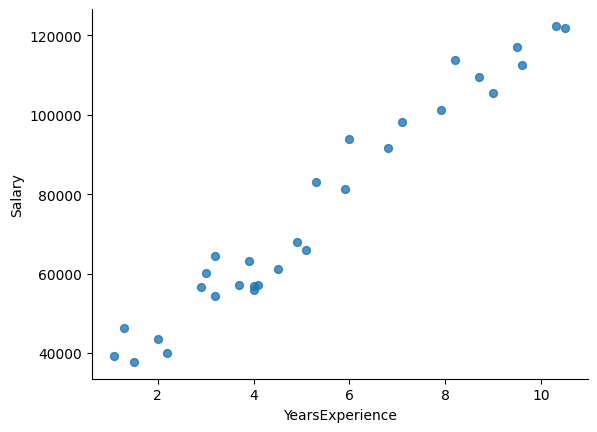

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='YearsExperience', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## 1.2 Fitting the Model

In [ ]:
# dataframe df: run linear regression using statmodels

import statsmodels.formula.api as smf

# Fit the linear regression model
model = smf.ols(formula="Salary ~ YearsExperience", data=df).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           1.14e-20
Time:                        17:35:47   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     

In [ ]:
'''
APA report example:
    A linear regression model was used to examine the relationship between years of experience and salary.
    The model explained a significant portion of the variance in salary (R-squared = 0.957, p < .001).
    There was a positive and statistically significant relationship between years of experience and salary (β = 9449.96, p < .001).
    The Durbin-Watson statistic (1.648) suggested no significant autocorrelation in the residuals.
    The normality of the residuals was confirmed by the Shapiro-Wilk test (p > .05).

'''

#2. Machine Learning Approach

## 2.1 Check Dataset

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## 2.2 Preprocessing : Train-Test Split

In [ ]:

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['YearsExperience']], df['Salary'], test_size=0.25, random_state=0)


##2.3 Model Fitting: Using Train Set

In [ ]:

from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# check model coeffs

print(model.coef_.round(2))
print(model.intercept_.round(2))

[9379.71]
26986.69


In [ ]:
model.coef_

array([9379.71049195])

In [ ]:
model.intercept_

26986.691316737248

In [ ]:
pd.Series(model.coef_, index = X_train.columns)

YearsExperience    9379.710492
dtype: float64

In [ ]:
# specify model equation

print(f"Salary = 9869.5 * YearsExperience + 25792.2")

Salary = 9869.5 * YearsExperience + 25792.2


## 2.4 Make prediction : using Test set

In [ ]:
# Make predictions using the model
y_pred = model.predict(X_test)


In [ ]:
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

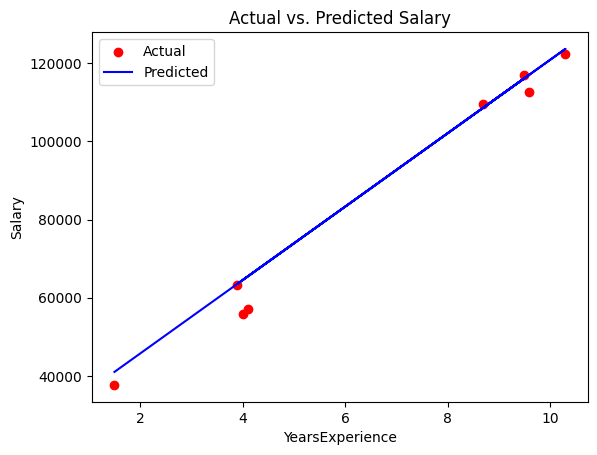

In [ ]:
# Plot the actual and predicted values
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.plot(X_test, y_pred, color='blue', label='Predicted')
plt.title('Actual vs. Predicted Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()



## 2.5 Evaluate the Model : $R^2$ and $MSE$ mean squared error
- MSE(or RMSE) is a 'relative metric' : used to compare with other models

In [ ]:
model.score(X_test, y_test)

0.9779208335417602

In [ ]:
# evaluate the model

from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = round(mean_squared_error(y_test, y_pred), 2)

# Print the mean squared error
print("Mean squared error:", mse)


Mean squared error: 22407940.14


---
---

##2.5 Check Some Equations

### 2.5.1 **Coe-efficient of Determination**

$$ R^2 = 1−\frac{\text{Residual Sum of Squares (RSS)}}{\text{Total Sum of Square (TSS)}​} $$  


$$ \text{R}^2 =1-\frac{\sum\limits_{i=1}^{N}(y_i - \hat{y}_i)^2}{\sum\limits_{i=1}^{N} (y_i - \bar{y})^2}\ $$  


In [ ]:
Image(url="https://github.com/kjmobile/data/blob/main/img/R_sq.png?raw=true", width=700)

### 2.5.2 **Mean Squared Error (MSE)** :



$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$



**note:**

* $\frac{1}{n}$: This is the normalization factor dividing by the number of observations.
* $\sum_{i=1}^{n}$: This is the summation symbol, indicating we sum over all observations from 1 to n.
* $y_i$: This represents the actual value of the i-th observation.
* $\hat{y}_i$: This represents the predicted value of the i-th observation.
* $^2$: This squares the difference between the actual and predicted values.



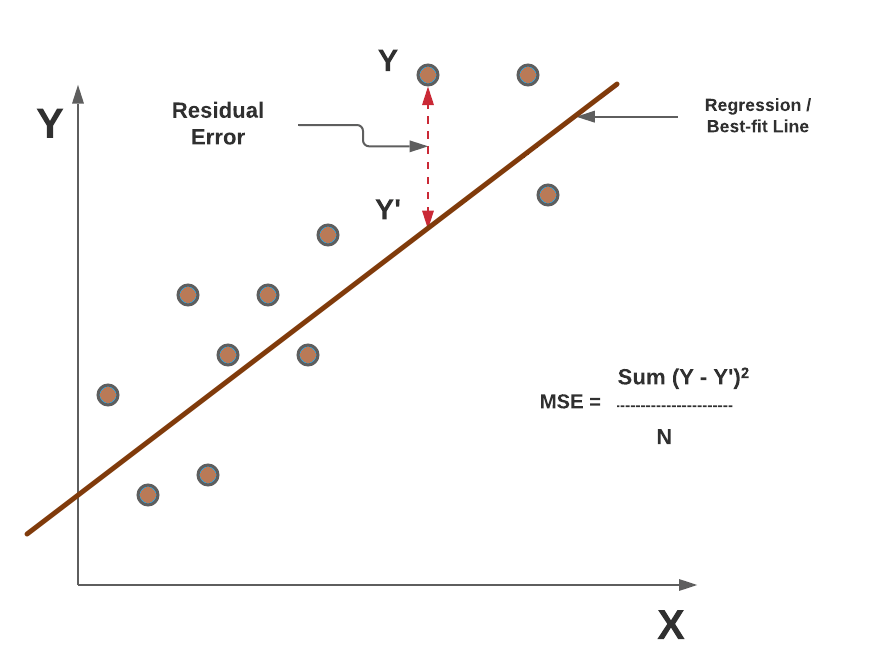

In [ ]:
Image("https://raw.githubusercontent.com/kjmobile/data/main/img/MSE.png",width=700)